Pandas(판다스)
===
---

## 1. "Pandas" 에 대하여
- 파이썬에서 사용하는 **데이터 분석/조작** 라이브러리
- Pandas의 주요 데이터 구조 : **Series(1차원), DataFrame(2차원)**
- Pandas는 다음 종류의 데이터에 적합한 분석 패키지이다.
    - SQL 테이블 또는 Excel 스프레드 시트에서와 같이 이질적으로 유형이 지정된 열이있는 데이블 형식 데이터
    - 정렬되고 정렬되지 않은 시계열 데이터
    - 행 및 열 레이블이 포함 된 임의의 행렬 데이터
    - 다른 형태의 관찰 / 통계 데이터 세트
---

In [1]:
import numpy as np
import pandas as pd

## 2. 시리즈(Series)
- 데이터프레임의 하위 자료형, 1개의 열로 구성
- 양식 : **pd.Series(data, index = index, name = name)** (index : 각 행의 이름, name : 열의 이름)

#### 1) 딕셔너리로 만들기

In [9]:
dict_data = {'a':1, 'b':2, 'c':3}
series_data = pd.Series(dict_data)
series_data

a    1
b    2
c    3
dtype: int64

In [10]:
type(series_data)  # Series의 타입

pandas.core.series.Series

In [14]:
series_data.index  # 인덱스

Index(['a', 'b', 'c'], dtype='object')

In [15]:
series_data.values  # 값

array([1, 2, 3], dtype=int64)

#### 2) 리스트로 만들기(튜플도 동일)

In [24]:
list_data = ['Jones', 3.14, 90, True]
series_data = pd.Series(list_data, index = ['name', 'PI', 'score', 'Boolean'])
series_data

name       Jones
PI          3.14
score         90
Boolean     True
dtype: object

In [25]:
print(series_data.index)
print(series_data.values)

Index(['name', 'PI', 'score', 'Boolean'], dtype='object')
['Jones' 3.14 90 True]


#### 3) 원소 선택, 인덱싱(Indexing)  (※ 위의 list_data 활용)

In [27]:
print(series_data[0], series_data['PI'])  # 원소 선택(전자는 리스트처럼, 후자는 딕셔너리처럼 사용하는 방식)

Jones 3.14


In [40]:
print(series_data[[1, 2]],'\n')  # 1, 2번 열 선택 ([]가 2개 중첩)
print(series_data[[1, 2, 3]],'\n')  # 1, 2, 3번 열 선택

print(series_data[['PI', 'Boolean']])  # PI, Boolean 을 인덱스로 가지고 있는 열 선택

PI       3.14
score      90
dtype: object 

PI         3.14
score        90
Boolean    True
dtype: object 

PI         3.14
Boolean    True
dtype: object


In [42]:
print(series_data[0:2], '\n')  # 0 ~ 1번 열 선택 ([]가 1번 사용)
print(series_data['name':'score'])  # name ~ score 까지 출력 ("score"도 출력된다!!)

name    Jones
PI       3.14
dtype: object 

name     Jones
PI        3.14
score       90
dtype: object


---

## 3. 데이터 프레임(Dataframe)
- 시리즈가 여러개 합쳐진 자료형 (데이터 프레임에서 하나의 열만 가져오면, 이는 곧 시리즈(Series)이다.)

### 1) 딕셔너리로 만들기

In [3]:
dict_data = {'a0':[1,2,3],'a1':[4,5,6],'a2':[7,8,9],'a3':[10,11,12],'a4':[13,14,15]}  # 양식 : {column's name : [elements in column]}
df_data = pd.DataFrame(dict_data)
df_data

,a0,a1,a2,a3,a4
0,1,4,7,10,13
1,2,5,8,11,14
2,3,6,9,12,15


In [5]:
print(df_data['a1'], '\n', type(df_data['a1']))  # 데이터 프레임에서 하나의 열만 가져오면, Series가 된다.

0    4
1    5
2    6
Name: a1, dtype: int64 
 <class 'pandas.core.series.Series'>


### 2) 리스트로 만들기
- 리스트들이 하나의 행(row)이 된다. (딕셔너리는 데이터 프레임의 열(column)을, 리스트는 행(row)을 쌓아가는 형태!)

In [81]:
# 양식 : pd.DataFrame([list], index = index, columns = columns)
df_data = pd.DataFrame([[12, '남', '서울'], [13, '여', '화성'], [15, '남', '부산'], [11, '여', '남양주']], index = ['철수', '영희', '민수', '민아'], columns = ['나이', '성별', '거주지'])
df_data

,나이,성별,거주지
철수,12,남,서울
영희,13,여,화성
민수,15,남,부산
민아,11,여,남양주


In [82]:
print(df_data.index)  # 인덱스
print(df_data.columns)  # 열(column)의 이름
print(df_data.values)  # value (데이터 행렬)

Index(['철수', '영희', '민수', '민아'], dtype='object')
Index(['나이', '성별', '거주지'], dtype='object')
[[12 '남' '서울']
 [13 '여' '화성']
 [15 '남' '부산']
 [11 '여' '남양주']]


### 3) 행, 열 이름 변경(기본 방식, rename 메소드)

In [83]:
df_data.index = ['Jones', 'Lisa', 'Tom', 'Micheal']  # 인덱스 변경 (column의 이름 변경도 마찬가지)
print(df_data.index)

Index(['Jones', 'Lisa', 'Tom', 'Micheal'], dtype='object')


In [84]:
# 양식 : df.rename(columns={변경 전 열이름, 변경 후 열이름}, inplace = True)
df_data.rename(columns = {'나이':'age', '성별' : 'sex'}, inplace = True)
df_data

,age,sex,거주지
Jones,12,남,서울
Lisa,13,여,화성
Tom,15,남,부산
Micheal,11,여,남양주


### 4) 행 / 열 삭제(drop 메소드)

In [94]:
exam_data = {'Math':[100,80,70], 'English':[98,89,95],
            'Music':[100,95,80], 'Ethics':[30,100,90]}
df_data = pd.DataFrame(exam_data, index = ['student_1','student_2','student_3'])
df_data

,Math,English,Music,Ethics
student_1,100,98,100,30
student_2,80,89,95,100
student_3,70,95,80,90


In [95]:
# 양식 : df.drop('행 또는 열이름', axis = 0 or 1, inplace = True)
df_data.drop('Ethics', axis = 1, inplace = True)  # 열 삭제
df_data.drop('student_3', inplace = True)  # 행 삭제 (default값 -> axis : 0)
df_data

,Math,English,Music
student_1,100,98,100
student_2,80,89,95


In [96]:
df_data.drop(['Math', 'Music'], axis = 1, inplace = True)  # 두 개 이상의 열을 삭제하고 싶으면 대괄호 사용!
df_data

,English
student_1,98
student_2,89


### 5) 행 선택 (iloc / loc 메소드)
- 행의 인덱스나 인덱스명을 key값처럼 사용한다.
- loc은 이름으로, iloc은 숫자로 인덱싱한다.
- 한 개의 행만 선택 시, Series의 형태로 반환하고, 여러 행 선택 시, DataFrame의 형태로 반환한다.
- 열의 선택은 df[열 이름]로 한다.

In [248]:
exam_data = {'수학':[90,80,100], '영어':[90,89,95],
            '음악':[85,95,90], '체육':[80,90,90]}
df = pd.DataFrame(exam_data, index = ['윤아','수혁','지민'])

label1 = df.iloc[0]  # iloc로 인덱싱
print(label1, '\n')  # loc로 인덱싱

lable2 = df.loc[['수혁','지민']]

수학    90
영어    90
음악    85
체육    80
Name: 윤아, dtype: int64 



#### ※ 조건으로 인덱싱하기

In [12]:
df.loc[[True, False, False]]  # 행 인덱싱

,수학,영어,음악,체육
윤아,90,90,85,80


In [16]:
df.loc[:, [True, True, False, False]]  # 열 인덱싱

,수학,영어
윤아,90,90
수혁,80,89
지민,100,95


In [19]:
condition = df > 80  # 배열의 원소들 중에서 80이 넘으면 True, 넘지 않으면 False 반환 (데이터 프레임 형태 그대로)
condition

,수학,영어,음악,체육
윤아,True,True,True,False
수혁,False,True,True,True
지민,True,True,True,True


In [20]:
df[condition]  

,수학,영어,음악,체육
윤아,90.0,90,85,NaN
수혁,NaN,89,95,90.0
지민,100.0,95,90,90.0


In [31]:
math_high_grade = (df['수학'] >= 90) & (df['영어'] >= 95) # 수학이 90점을 넘고, 영어가 95점을 넘으면 True, 아니면 False 반환
math_high_grade

윤아    False
수혁    False
지민     True
dtype: bool

In [34]:
df.loc[math_high_grade]    # 수학이 90점을 넘고, 영어가 95점을 넘는 학생의 데이터 추출

,수학,영어,음악,체육
지민,100,95,90,90


### 6) 범위 슬라이싱

In [5]:
exam_data = {'수학':[90,80,100,60,70], '영어':[90,89,95,70,100],
            '음악':[85,95,50,50,80], '체육':[80,90,90,100,50]}
df = pd.DataFrame(exam_data, index = ['윤아','수혁','지민', '우철', '유나'])
df

,수학,영어,음악,체육
윤아,90,90,85,80
수혁,80,89,95,90
지민,100,95,50,90
우철,60,70,50,100
유나,70,100,80,50


In [121]:
df.iloc[: : 2]  # 모든 행을 2행 간격으로 선택

,수학,영어,음악,체육
윤아,90,90,85,80
지민,100,95,50,90
유나,70,100,80,50


In [122]:
df.iloc[0:4:3]  # 0부터 3행까지 3행 간격으로 선택

,수학,영어,음악,체육
윤아,90,90,85,80
우철,60,70,50,100


In [123]:
df.iloc[: : -1] # 모든 행을 -1행 간격으로, 즉 역순 정렬

,수학,영어,음악,체육
유나,70,100,80,50
우철,60,70,50,100
지민,100,95,50,90
수혁,80,89,95,90
윤아,90,90,85,80


In [8]:
df.loc[:, '수학':'음악']  # 열 연속 선택 (df['수학':'음악']은 오류가 난다.)

,수학,영어,음악
윤아,90,90,85
수혁,80,89,95
지민,100,95,50
우철,60,70,50
유나,70,100,80


### 7) 원소 선택(loc, iloc)

In [128]:
df.loc[['윤아', '지민']]  # 두 개 이상의 행 선택 -> 대괄호 중첩
df.loc['윤아', '수학']  # loc[n, m] : n행의 m열에 있는 원소 선택 -> 대괄호 1번  

90

In [133]:
df.iloc[0, 1:3]  # # iloc[n, m] : n행의 m열에 있는 원소 선택

영어    90
음악    85
Name: 윤아, dtype: int64

### 8) 행, 열 추가

In [146]:
exam_data = {'수학':[90,80,100,60,70], '영어':[90,89,95,70,100],
            '음악':[85,95,50,50,80], '체육':[80,90,90,100,50]}
df = pd.DataFrame(exam_data, index = ['윤아','수혁','지민', '우철', '유나'])
df

,수학,영어,음악,체육
윤아,90,90,85,80
수혁,80,89,95,90
지민,100,95,50,90
우철,60,70,50,100
유나,70,100,80,50


In [148]:
df['과학'] = np.nan  # 열 추가 -> 양식 : df['새로운 열 이름'] = 값
df.loc['대한'] = [60,70,90,100,np.nan]  # 행 추가
df

,수학,영어,음악,체육,과학
윤아,90.0,90.0,85.0,80.0,NaN
수혁,80.0,89.0,95.0,90.0,NaN
지민,100.0,95.0,50.0,90.0,NaN
우철,60.0,70.0,50.0,100.0,NaN
유나,70.0,100.0,80.0,50.0,NaN
대한,60.0,70.0,90.0,100.0,NaN


In [57]:
exam_data = {'이름':['철수','영희','민철']
             ,'수학':[90,80,70], '영어':[98,89,95],
            '음악':[85,95,100], '체육':[100,90,90]}
df = pd.DataFrame(exam_data)

df.set_index('이름', inplace=True)  # 인덱스로 지정
df

,수학,영어,음악,체육
이름,,,,
철수,90,98,85,100
영희,80,89,95,90
민철,70,95,100,90


In [59]:
df.index.name = '성명'  # 인덱스 명 설정(변경)
df

,수학,영어,음악,체육
성명,,,,
철수,90,98,85,100
영희,80,89,95,90
민철,70,95,100,90


### 9) 전치 행렬 (transpose 메소드)

In [153]:
df.T  # 방법 1) .T

이름,철수,영희,민철
수학,90,80,70
영어,98,89,95
음악,85,95,100
체육,100,90,90


In [158]:
df.T.transpose()  # 방법 2) .transpose()

,수학,영어,음악,체육
이름,,,,
철수,90,98,85,100
영희,80,89,95,90
민철,70,95,100,90


### 10) 큰 데이터 다루기
#### 1) csv 파일 가져오기

In [125]:
laptops_df = pd.read_csv('./CSV_files/laptops.csv')  #  CSV_files 디렉토리에 있는 csv 파일을 가져온다.
laptops_df

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments
0,Dell,Inspiron 15-3567,4,hdd,1024,15.6,40000,intel,i5,2.5,intel,NaN,linux,2.50,NaN
1,Apple,MacBook Air,8,ssd,128,13.3,55499,intel,i5,1.8,intel,2.0,mac,1.35,NaN
2,Apple,MacBook Air,8,ssd,256,13.3,71500,intel,i5,1.8,intel,2.0,mac,1.35,NaN
3,Apple,MacBook Pro,8,ssd,128,13.3,96890,intel,i5,2.3,intel,2.0,mac,3.02,NaN
4,Apple,MacBook Pro,8,ssd,256,13.3,112666,intel,i5,2.3,intel,2.0,mac,3.02,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Asus,A555LF,8,hdd,1024,15.6,39961,intel,i3 4th gen,1.7,nvidia,2.0,windows,2.30,NaN
163,Asus,X555LA-XX172D,4,hdd,500,15.6,28489,intel,i3 4th gen,1.9,intel,NaN,linux,2.30,NaN
164,Asus,X554LD,2,hdd,500,15.6,29199,intel,i3 4th gen,1.9,intel,1.0,linux,2.30,NaN
165,Asus,X550LAV-XX771D,2,hdd,500,15.6,29990,intel,i3 4th gen,1.7,intel,NaN,linux,2.50,NaN


#### 2) head : 맨 위에 있는 행 몇 개를 가져온다.

In [68]:
laptops_df.head(5)  # 맨 위의 5개 행만 가져온다.

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments
0,Dell,Inspiron 15-3567,4,hdd,1024,15.6,40000,intel,i5,2.5,intel,NaN,linux,2.50,NaN
1,Apple,MacBook Air,8,ssd,128,13.3,55499,intel,i5,1.8,intel,2.0,mac,1.35,NaN
2,Apple,MacBook Air,8,ssd,256,13.3,71500,intel,i5,1.8,intel,2.0,mac,1.35,NaN
3,Apple,MacBook Pro,8,ssd,128,13.3,96890,intel,i5,2.3,intel,2.0,mac,3.02,NaN
4,Apple,MacBook Pro,8,ssd,256,13.3,112666,intel,i5,2.3,intel,2.0,mac,3.02,NaN


#### 3) tail : 맨 아래에 있는 행 몇 개를 가져온다.

In [69]:
laptops_df.tail(3)  # 맨 아래의 3개 행만 가져온다.

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments
164,Asus,X554LD,2,hdd,500,15.6,29199,intel,i3 4th gen,1.9,intel,1.0,linux,2.3,NaN
165,Asus,X550LAV-XX771D,2,hdd,500,15.6,29990,intel,i3 4th gen,1.7,intel,NaN,linux,2.5,NaN
166,Asus,X540LA-XX538T,4,hdd,1024,15.6,30899,intel,i3 5th gen,2.0,intel,NaN,windows,2.3,NaN


#### 4) shape, index, columns : 모양, 인덱스, 열

In [71]:
print(laptops_df.shape)  # 모양
print(laptops_df.index)  # 인덱스
print(laptops_df.columns)  # 열

(167, 15)
RangeIndex(start=0, stop=167, step=1)
Index(['brand', 'model', 'ram', 'hd_type', 'hd_size', 'screen_size', 'price',
       'processor_brand', 'processor_model', 'clock_speed',
       'graphic_card_brand', 'graphic_card_size', 'os', 'weight', 'comments'],
      dtype='object')


#### 5) info : 데이터 프레임의 총괄적인 설명을 출력한다.

In [72]:
laptops_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   brand               167 non-null    object 
 1   model               167 non-null    object 
 2   ram                 167 non-null    int64  
 3   hd_type             167 non-null    object 
 4   hd_size             167 non-null    int64  
 5   screen_size         167 non-null    float64
 6   price               167 non-null    int64  
 7   processor_brand     167 non-null    object 
 8   processor_model     167 non-null    object 
 9   clock_speed         166 non-null    float64
 10  graphic_card_brand  163 non-null    object 
 11  graphic_card_size   81 non-null     float64
 12  os                  167 non-null    object 
 13  weight              160 non-null    float64
 14  comments            55 non-null     object 
dtypes: float64(4), int64(3), object(8)
memory usage: 19.7+ KB

#### 6) describe : 수치가 들어있는 열들에 대한 통계값이 담긴 데이터 프레임을 반환한다.

In [90]:
laptops_df.describe()

,ram,hd_size,screen_size,price,clock_speed,graphic_card_size,weight
count,167.000000,167.00000,167.000000,167.000000,166.000000,81.000000,160.000000
mean,6.898204,768.91018,14.775210,64132.898204,2.321084,52.160494,2.250813
std,3.787479,392.99080,1.376526,42797.674010,0.554187,444.134142,0.648446
min,2.000000,32.00000,10.100000,13872.000000,1.100000,1.000000,0.780000
25%,4.000000,500.00000,14.000000,35457.500000,1.900000,2.000000,1.900000
50%,8.000000,1024.00000,15.600000,47990.000000,2.300000,2.000000,2.200000
75%,8.000000,1024.00000,15.600000,77494.500000,2.600000,4.000000,2.600000
max,16.000000,2048.00000,17.600000,226000.000000,3.800000,4000.000000,4.200000


In [94]:
laptops_df['brand'].describe()  # 167개 아이템 / 8개 종목 / 가장 빈도수가 높은 아이템 : HP / HP의 빈도수

count     167
unique      8
top        HP
freq       55
Name: brand, dtype: object

#### 7) sort_values (value 값에 따른 정렬) :  value값에 대한 조건에 맞게 정렬해준다.

In [76]:
laptops_df.sort_values(by = 'price').head(5)  # price에 대한 내림차순으로 정렬하고, 상위 5개를 출력한다. (가장 싼 아이템 5개)

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments
148,Acer,Aspire SW3-016,2,ssd,32,10.1,13872,intel,Atom Z8300,1.44,intel,NaN,windows,1.2,NaN
83,Acer,A315-31CDC UN.GNTSI.001,2,ssd,500,15.6,17990,intel,Celeron,1.10,intel,NaN,windows,2.1,NaN
108,Acer,Aspire ES-15 NX.GKYSI.010,4,hdd,500,15.6,17990,amd,A4-7210,1.80,amd,NaN,windows,2.4,NaN
100,Acer,A315-31-P4CRUN.GNTSI.002,4,hdd,500,15.6,18990,intel,pentium,1.10,intel,NaN,windows,NaN,NaN
73,Acer,Aspire ES1-523,4,hdd,1024,15.6,19465,amd,A4-7210,1.80,amd,NaN,linux,2.4,NaN


In [81]:
laptops_df.sort_values(by = 'weight', ascending = False).head(3)  # weight에 대한 오름차순으로 정렬하고, 상위 3개를 출력한다. (가장 무거운 아이템 3개)

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments
31,Acer,Predator 17,16,ssd,256,17.3,178912,intel,i7,2.6,nvidia,NaN,windows,4.2,Integrated Graphics
82,Dell,Inspiron 17 7567,16,ssd,256,15.6,119780,intel,i7,2.8,NaN,NaN,windows,4.1,NaN
130,Alienware,17R3 1471045648,8,hdd,1024,17.3,150453,intel,i7,2.6,nvidia,3.0,windows,3.8,NaN


#### 8) 아이템 항목의 종류 구하기 (중복 X)

In [89]:
laptops_df['brand'].unique()  # brand 열의 아이템 종류 나열(Array 형태)

array(['Acer', 'Dell', 'Alienware', 'Lenovo', 'HP', 'Apple', 'Asus',
       'Microsoft'], dtype=object)

In [88]:
laptops_df['brand'].value_counts()  # brand 열의 아이템 종류와 개수 나열(Series 형태)

HP           55
Acer         35
Dell         31
Lenovo       18
Asus          9
Apple         7
Alienware     6
Microsoft     6
Name: brand, dtype: int64

---

## 4. Matplotlib
- 데이터를 차트나 플롯(Plot)으로 그려주는 라이브러리 패키지.
- 데이터 시각화(Data Visualiztion)에 사용된다.

In [221]:
# cell magic
%matplotlib inline
import pandas as pd

df = pd.read_csv('./CSV_files/broadcast (1).csv', index_col = 0)

In [203]:
df

,KBS,MBC,SBS,TV CHOSUN,JTBC,Channel A,MBN
2011,35.951,18.374,11.173,9.102,7.380,3.771,2.809
2012,36.163,16.022,11.408,8.785,7.878,5.874,3.310
2013,31.989,16.778,9.673,9.026,7.810,5.350,3.825
2014,31.210,15.663,9.108,9.440,7.490,5.776,4.572
2015,27.777,16.573,9.099,9.940,7.267,6.678,5.520
2016,27.583,14.982,8.669,9.829,7.727,6.624,5.477
2017,26.890,12.465,8.661,8.886,9.453,6.056,5.215


### 1) 선 그래프(Line graph)
- 추이, 경과 등을 나타내는데 사용한다.

<AxesSubplot:>

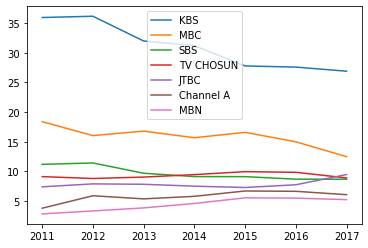

In [207]:
df.plot(kind = 'line')  # kind : 그래프의 종류를 설정 (Default : 'line')

<AxesSubplot:>

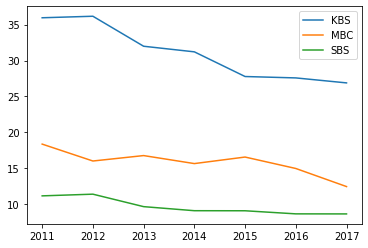

In [209]:
df.plot(y = ['KBS', 'MBC', 'SBS'])

<AxesSubplot:>

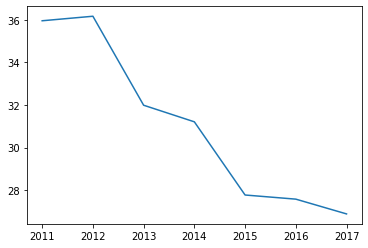

In [210]:
df['KBS'].plot()

### 2) 막대 그래프(Bar chart)
- 여러 요소들을 비교하거나, 최대 또는 최소를 강조하고 할 때 사용한다.

In [211]:
df = pd.DataFrame({'Male' : [103, 363, 151, 154, 413, 88], 'Female' : [178, 289, 97, 232, 109, 129]}, index = ['Swimming', 'Baseball', 'Basketball', 'Golf', 'Soccer', 'Bowling'])
df

,Male,Female
Swimming,103,178
Baseball,363,289
Basketball,151,97
Golf,154,232
Soccer,413,109
Bowling,88,129


<AxesSubplot:>

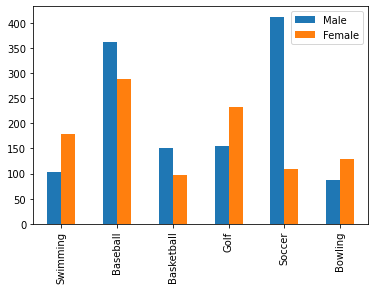

In [215]:
df.plot(kind = 'bar')  # 수직 막대 그래프

<AxesSubplot:>

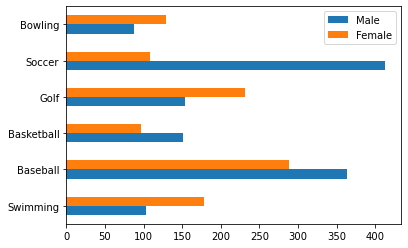

In [216]:
df.plot(kind = 'barh')  # 수평 막대 그래프

<AxesSubplot:>

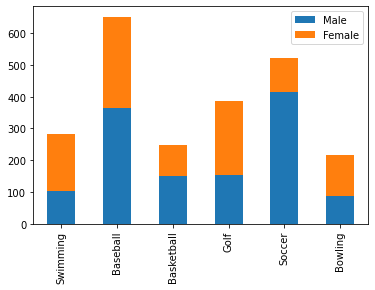

In [217]:
df.plot(kind = 'bar', stacked = True)

### 3) 파이 그래프(Pie chart)
- 전체에서 부분이 차지하는 비율을 강조하고자 할 때 사용한다.

In [250]:
df = pd.read_csv('./CSV_files/Silicon_valley_workers.csv')
df

,company,year,race,gender,job_category,count
0,23andMe,2016,Hispanic_or_Latino,male,Executives,0
1,23andMe,2016,Hispanic_or_Latino,male,Managers,1
2,23andMe,2016,Hispanic_or_Latino,male,Professionals,7
3,23andMe,2016,Hispanic_or_Latino,male,Technicians,0
4,23andMe,2016,Hispanic_or_Latino,male,Sales workers,0
...,...,...,...,...,...,...
4435,Sanmina,2016,Overall_totals,NaN,laborers and helpers,4
4436,Sanmina,2016,Overall_totals,NaN,Service workers,57
4437,Sanmina,2016,Overall_totals,NaN,Totals,5205
4438,Sanmina,2016,Overall_totals,NaN,Previous_totals,5615


<AxesSubplot:ylabel='count'>

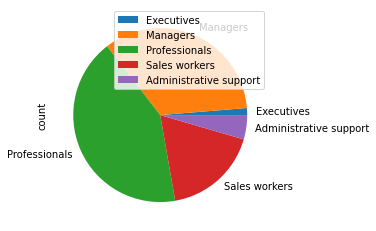

In [252]:
# 어도비 직원들의 직군 분포
condition = (df['company'] == 'Adobe') & (df['count'] > 0) & (df['race'] == 'Overall_totals') & (df['job_category'] != 'Totals') & (df['job_category'] != 'Previous_totals')
# 조건 : 어도비 회사 중 / 직원이 0명보다 많고 / 인종 상관없이 / count열에서 'Totals'과 'Previous_totals'는 제외하고
new_df = df.loc[condition]  # 위 조건으로 데이터 프레임 생성
new_df.set_index('job_category', inplace = True)  # index명이 파이 차트 요소의 종류(x)가 된다. (-> 'job_category'가 파이 차트의 종목이 된다.)
new_df.plot(kind = 'pie', y = 'count')  # 파이 차트의 수치로 나타낼 대상(y) : 'count'

### 4) 히스토그램(Histogram)
- 연속 숫자 값의 분포를 나타낼 때 사용한다.

<AxesSubplot:ylabel='Frequency'>

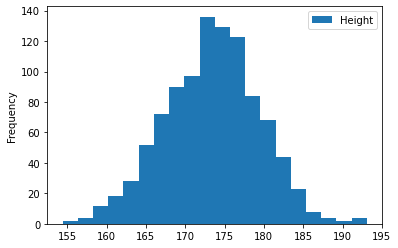

In [246]:
df = pd.read_csv('./CSV_files/body.csv', index_col = 0)
df.plot(kind = 'hist', y = 'Height', bins = 20)  # 몸무게 히스토그램
# bins로 몇 개의 구간으로 히스토그램을 나타낼지를 정할 수 있다. 숫자가 커질 수록 히스토그램이 세밀해진다.

### 5) 박스 플롯(Box plot)
- 히스토그램을 위에서 봤다고 생각하면 쉽다.
- 통계적 자료를 눈으로 확인하기 쉽다.(25%지점, 75%지점, 평균, 분산, 이상점 등)

<AxesSubplot:>

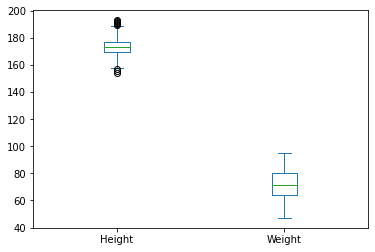

In [253]:
df = pd.read_csv('./CSV_files/body.csv', index_col = 0)
df.plot(kind = 'box')

### 6) 산점도(Scatter plot)
- 2종류의 데이터의 "관계"를 파악하는데 사용한다.
- 양(+) 상관, 음(-) 상관, 무상관의 관계를 파악한다.

<AxesSubplot:xlabel='math score', ylabel='reading score'>

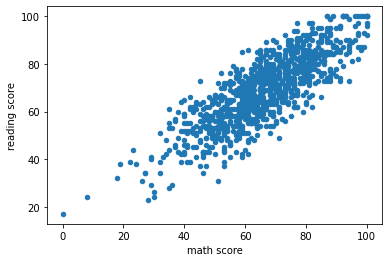

In [262]:
df = pd.read_csv('./CSV_files/exam.csv')
df.plot(kind = 'scatter', x = 'math score', y = 'reading score')  # 수학 성적과 읽기 성적의 상관관계

<AxesSubplot:xlabel='reading score', ylabel='writing score'>

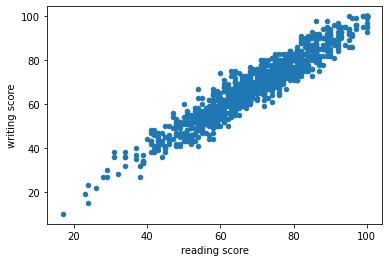

In [264]:
df.plot(kind = 'scatter', x = 'reading score', y = 'writing score')  # 읽기 성적과 쓰기 성적의 상관관계